In [ ]:
import numpy as np

def save_embeddings(emb, dic, filename):
    f = open(filename, 'w')
    for i in range(len(emb)):
        f.write(dic[i])
        for j in emb[i]:
            f.write(" "+str(j))
        f.write("\n")
            
def load_embeddings(filename):
    emb = {}
    dic = dict()
    reverse_dic = dict()
    
    f = open(filename, "r")
    eof = False
    id = 0
    while not eof:
        
        line = f.readline()
        if line != "":
            sline = line.split()
            vec = np.float64(sline[1:])
            word = sline[0]
            #print(word)
            #print(vec)
            emb[id] = vec
            dic[id] = word
            reverse_dic[word] = id
            id += 1
        else :
            eof = True
    return emb, dic, reverse_dic

In [ ]:
def dist(a,b):   
    # la distance euclidienne entre a et b
    resultat = np.array([])
    
    for i in range(len(b)):
        resultat = np.append(resultat,[(np.sqrt(np.sum(np.power(a-b[i], 2))))])
        
    return resultat


In [160]:
#emb2.txt est le meilleur embedding de 50 dimension (plus faible perte)
emb, dic, reverse_dic = load_embeddings("data/L-embW3D80.txt")

In [110]:
def nClosestWords(word, n): #the dics and embeddings need to be charged already

    import random as r
    import collections

    try:
        id_word = reverse_dic[word]
    except:
        print("The chosen word doesn't exist in Lord Of The Ring. Please try something else.")
        return
    vec = emb[id_word]

    distances  = dist(vec,emb)
    print( word + " ---> ")

    mins = distances.argsort()[:n]
    #mins = np.delete(mins, 0) #we delete the minmum distance, wich is the same word
    for i in mins:
        print(dic[i])


In [ ]:
def closestWord(vec):
    #changement pour afficher les 10 plus proches de aIsToB
    distances  = dist(vec,emb)
    return distances.argsort()[:10]
    

In [ ]:
def aIsToB(boy, son, girl): #dictionnary and embeddings must be loaded
    #This function tries to guess the corresponding hword given a couple of words, and another one for comparison
    # EX: "boy" is to "son" what "girl" is to ? => the model should guess "daughter"
    
    
    id_boy = reverse_dic[boy]
    id_son = reverse_dic[son]
    id_girl = reverse_dic[girl]
    
    emb_boy = emb[id_boy]
    emb_son = emb[id_son]
    emb_girl = emb[id_girl]
    
    diff = emb_son - emb_boy
    
    guess = emb_girl + diff
        
    #print(guess)
    #print(emb_son)
    guessed_word = closestWord(guess)
    
    print(boy + " is to "+ son)
    print("what " + girl + " is to ?")
    print( "==> " )
    for i in guessed_word:
        print(dic[i])
    

    
    
    

In [ ]:
def aPlusB(a, b):
    id_a = reverse_dic[a]
    id_b = reverse_dic[b]
    
    emb_a = emb[id_a]
    emb_b = emb[id_b]
    
    new_emb = emb_a + emb_b
    
    guessed_word = closestWord(new_emb)
    
    print(a +" + "+b+" ==> ")
    
    for i in guessed_word:
        print(dic[i])

    

**The cell below loads the embeddings as a DataFrame**

In [161]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


feat_cols = range(len(emb[1])) #SIZE OF THE EMBEDDINGS

feat_index = [dic[i] for i in range(len(dic))]

embeddings = [emb[i] for i in range(len(emb))]

df = pd.DataFrame(embeddings, index = feat_index, columns=feat_cols)

#Creation of the dataFrame containing the embeddings, indexed by their corresponding String.

In [104]:
def plotWords(listWords):
    
    words = [listWords[i] for i in range(len(listWords))]

    dfc = df.loc[words].copy()

    if len(dfc) < 300:
        tsne = PCA(n_components=2)
    else:
        tsne = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    tsne_results = tsne.fit_transform(dfc)
    dfc['x-tsne'] = tsne_results[:,0]
    dfc['y-tsne'] = tsne_results[:,1]
    #print(dfc.head())

    fig = plt.figure(figsize=(20,15), dpi=800)
    ax = fig.add_subplot(1,1,1)

    for i in range(len(dfc)):
        ax.scatter(
            x=dfc.iloc[i]["x-tsne"], 
            y=dfc.iloc[i]["y-tsne"],
            alpha=0.9,
        )
        ax.text(
            x=dfc.iloc[i]["x-tsne"],
            y=dfc.iloc[i]["y-tsne"],
            s=dfc.index[i],
            alpha=0.9,
        )
    plt.show()

In [105]:
def plot_word_pairs(word_pairs):

    words = list(set([w for pair in word_pairs for w in pair]))
    #words = ["aragorn","arathorn","gimli","stone","gloin","cheese","duck","log"]
    print words
    dfs = df.loc[words].copy()
    
    tsne = PCA(n_components=2)
    results = tsne.fit_transform(dfs.iloc[:,:100])
    dfs['x'] = results[:,0]
    dfs['y'] = results[:,1]

    fig = plt.figure(figsize=(17,10), dpi=400)
    ax = fig.add_subplot(1,1,1)
    colors = plt.cm.tab10.colors
    for i in range(len(dfs)):
        ax.scatter(
            x=dfs.iloc[i]["x"],
            y=dfs.iloc[i]["y"],
            alpha=0.9,
            c=colors[i%10]
        )
        ax.text(
            x=dfs.iloc[i]["x"],
            y=dfs.iloc[i]["y"],
            s=dfs.index[i],
            color=colors[i%10]
        )

    for pair in word_pairs: 
        w1, w2 = pair
        w1x, w1y = dfs.loc[w1]["x"], dfs.loc[w1]["y"]
        w2x, w2y = dfs.loc[w2]["x"], dfs.loc[w2]["y"]
        vec = np.array([[w1x, w1y, w2x-w1x, w2y-w1y]])
        X, Y, U, V = zip(*vec)
        ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, width=0.004, color=colors[0])    
    plt.show()



In [ ]:
aIsToB("is","was", "go")


In [ ]:
aPlusB("aragorn", "father")

print("")

guessed_word = closestWord(emb[reverse_dic["galadriel"]])
for i in guessed_word:
        print(dic[i])

In [162]:
plotWords([dic[i] for i in range(299)])

#plotWords(["aragorn","arathorn","gimli","stone","gloin","cheese","duck","log"])

['be', 'had', 'have', 'go', 'went', 'was']


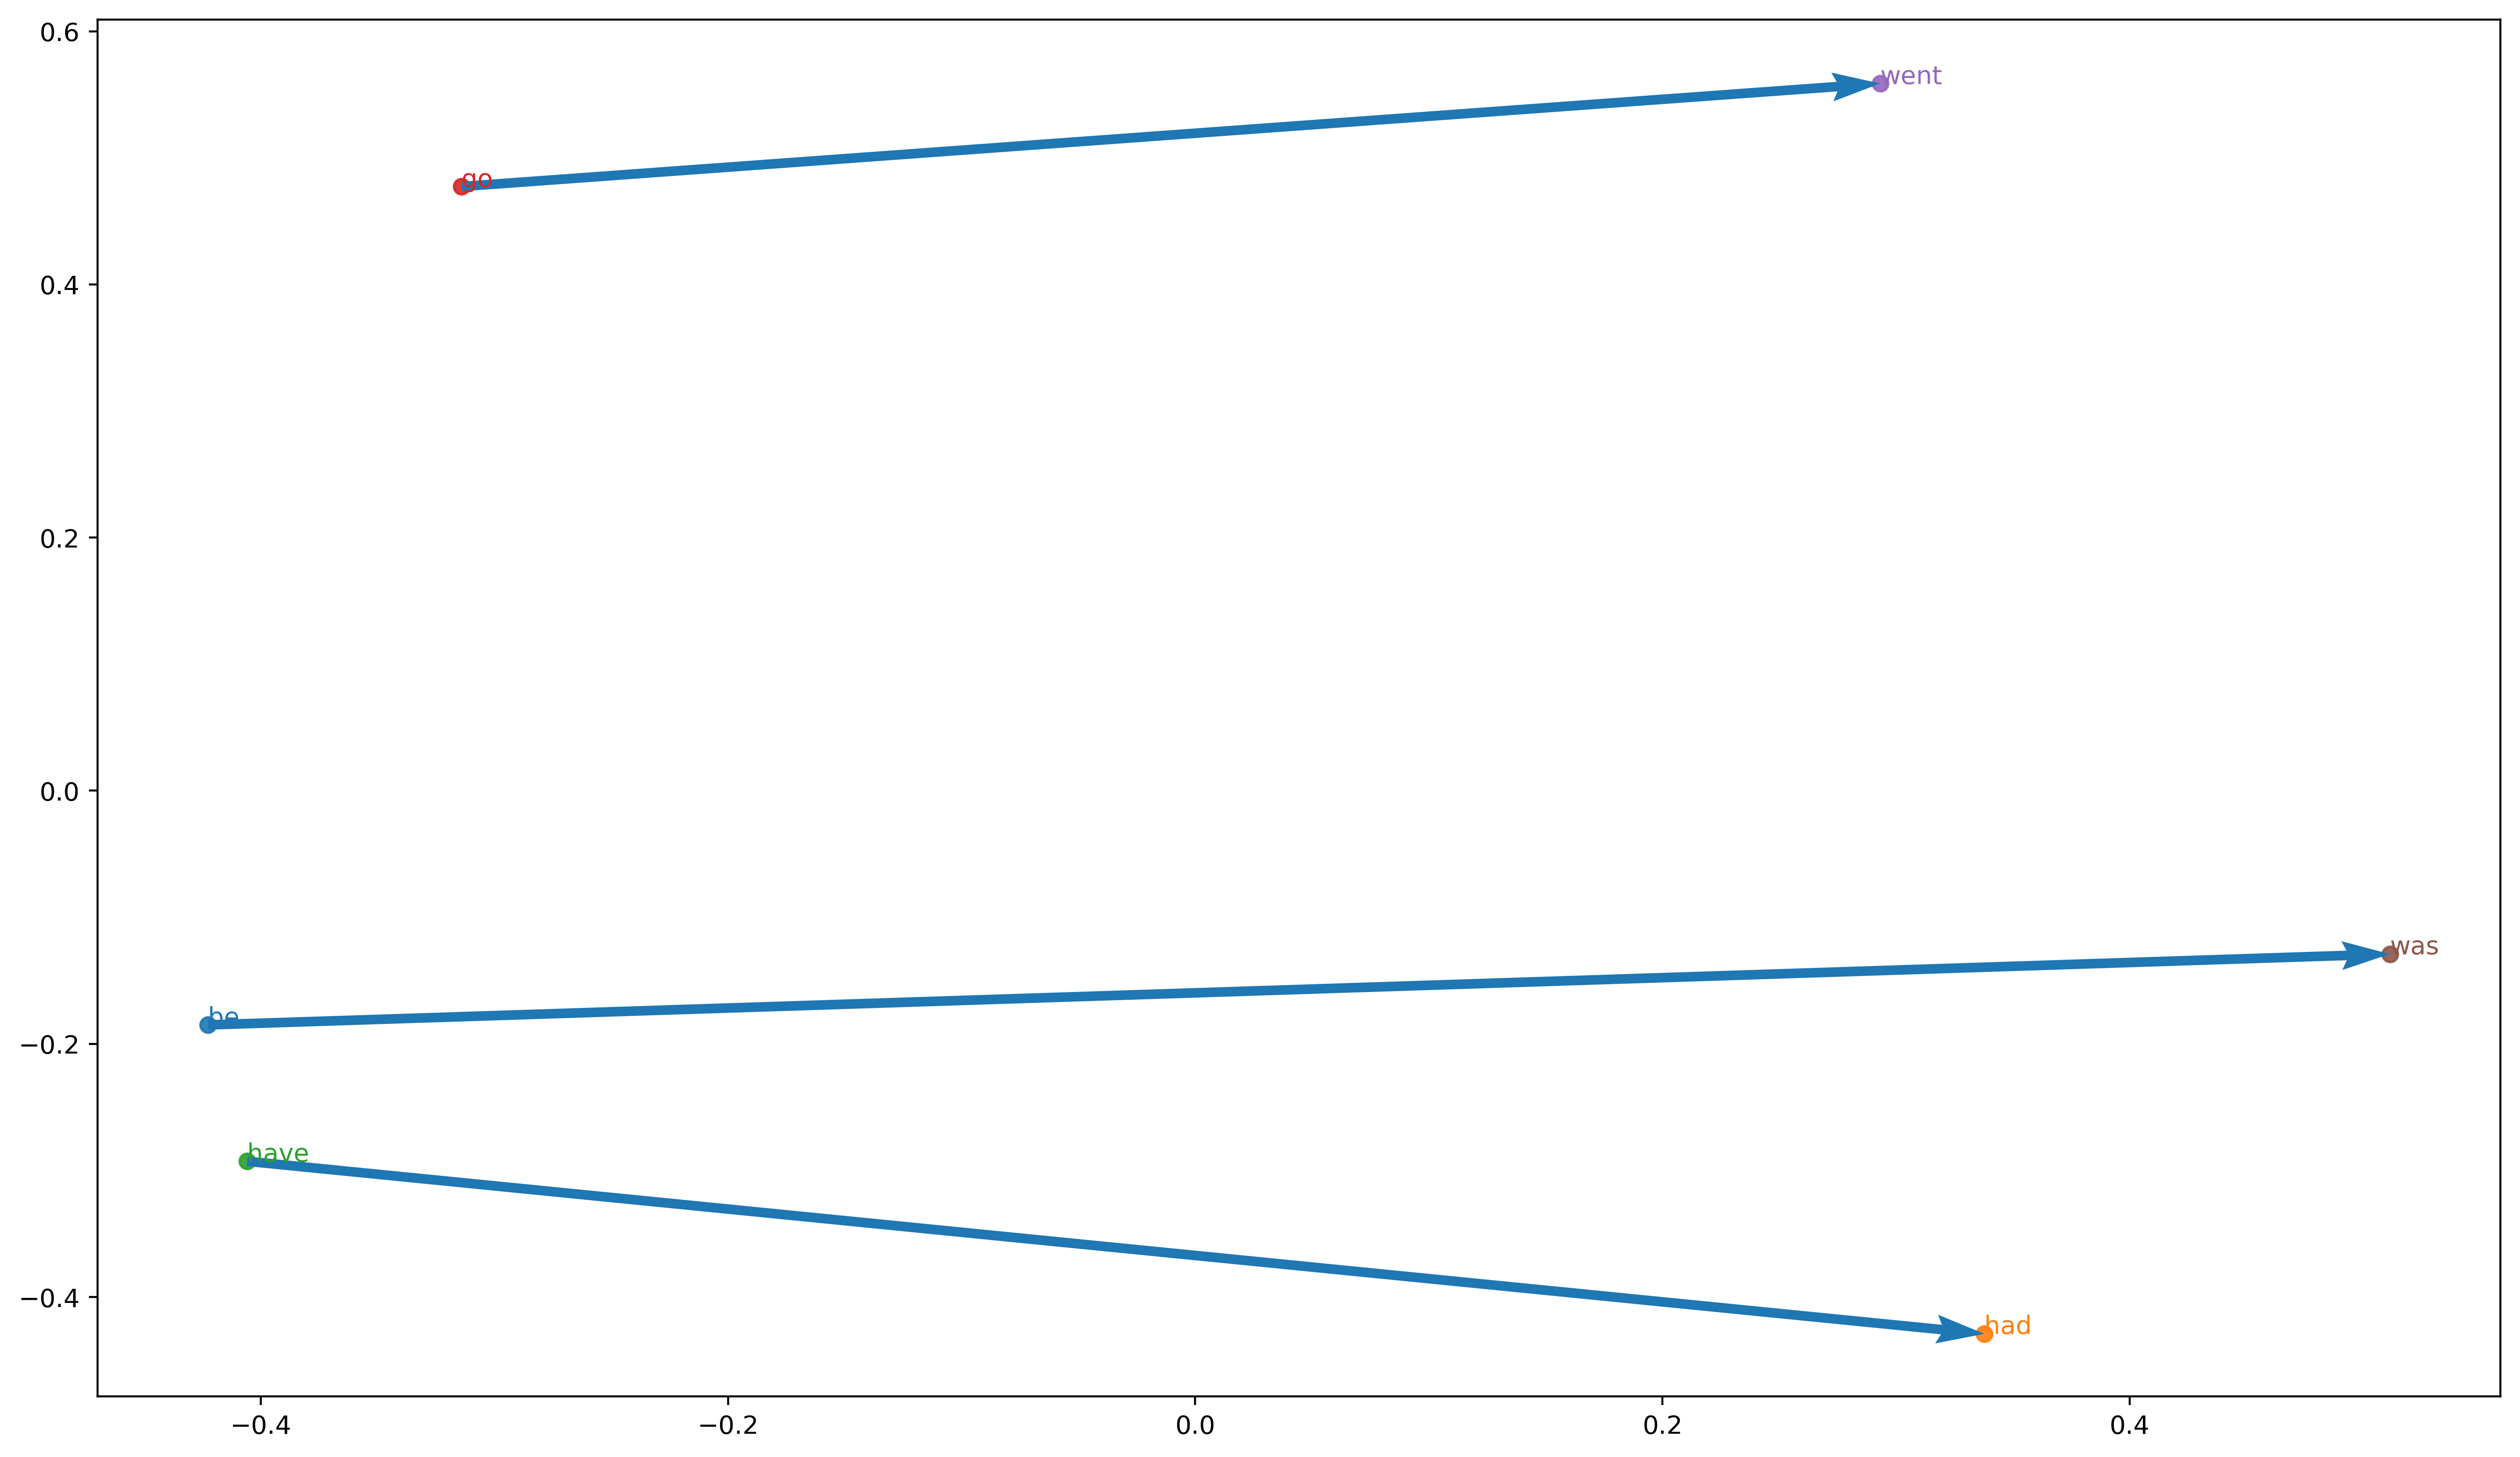

In [163]:
plot_word_pairs([("go", "went"), ("be", "was"),("have", "had")])

['taller', 'strong', 'big', 'stronger', 'dark', 'strongest', 'biggest', 'tall', 'darkest', 'tallest', 'bigger', 'darker']


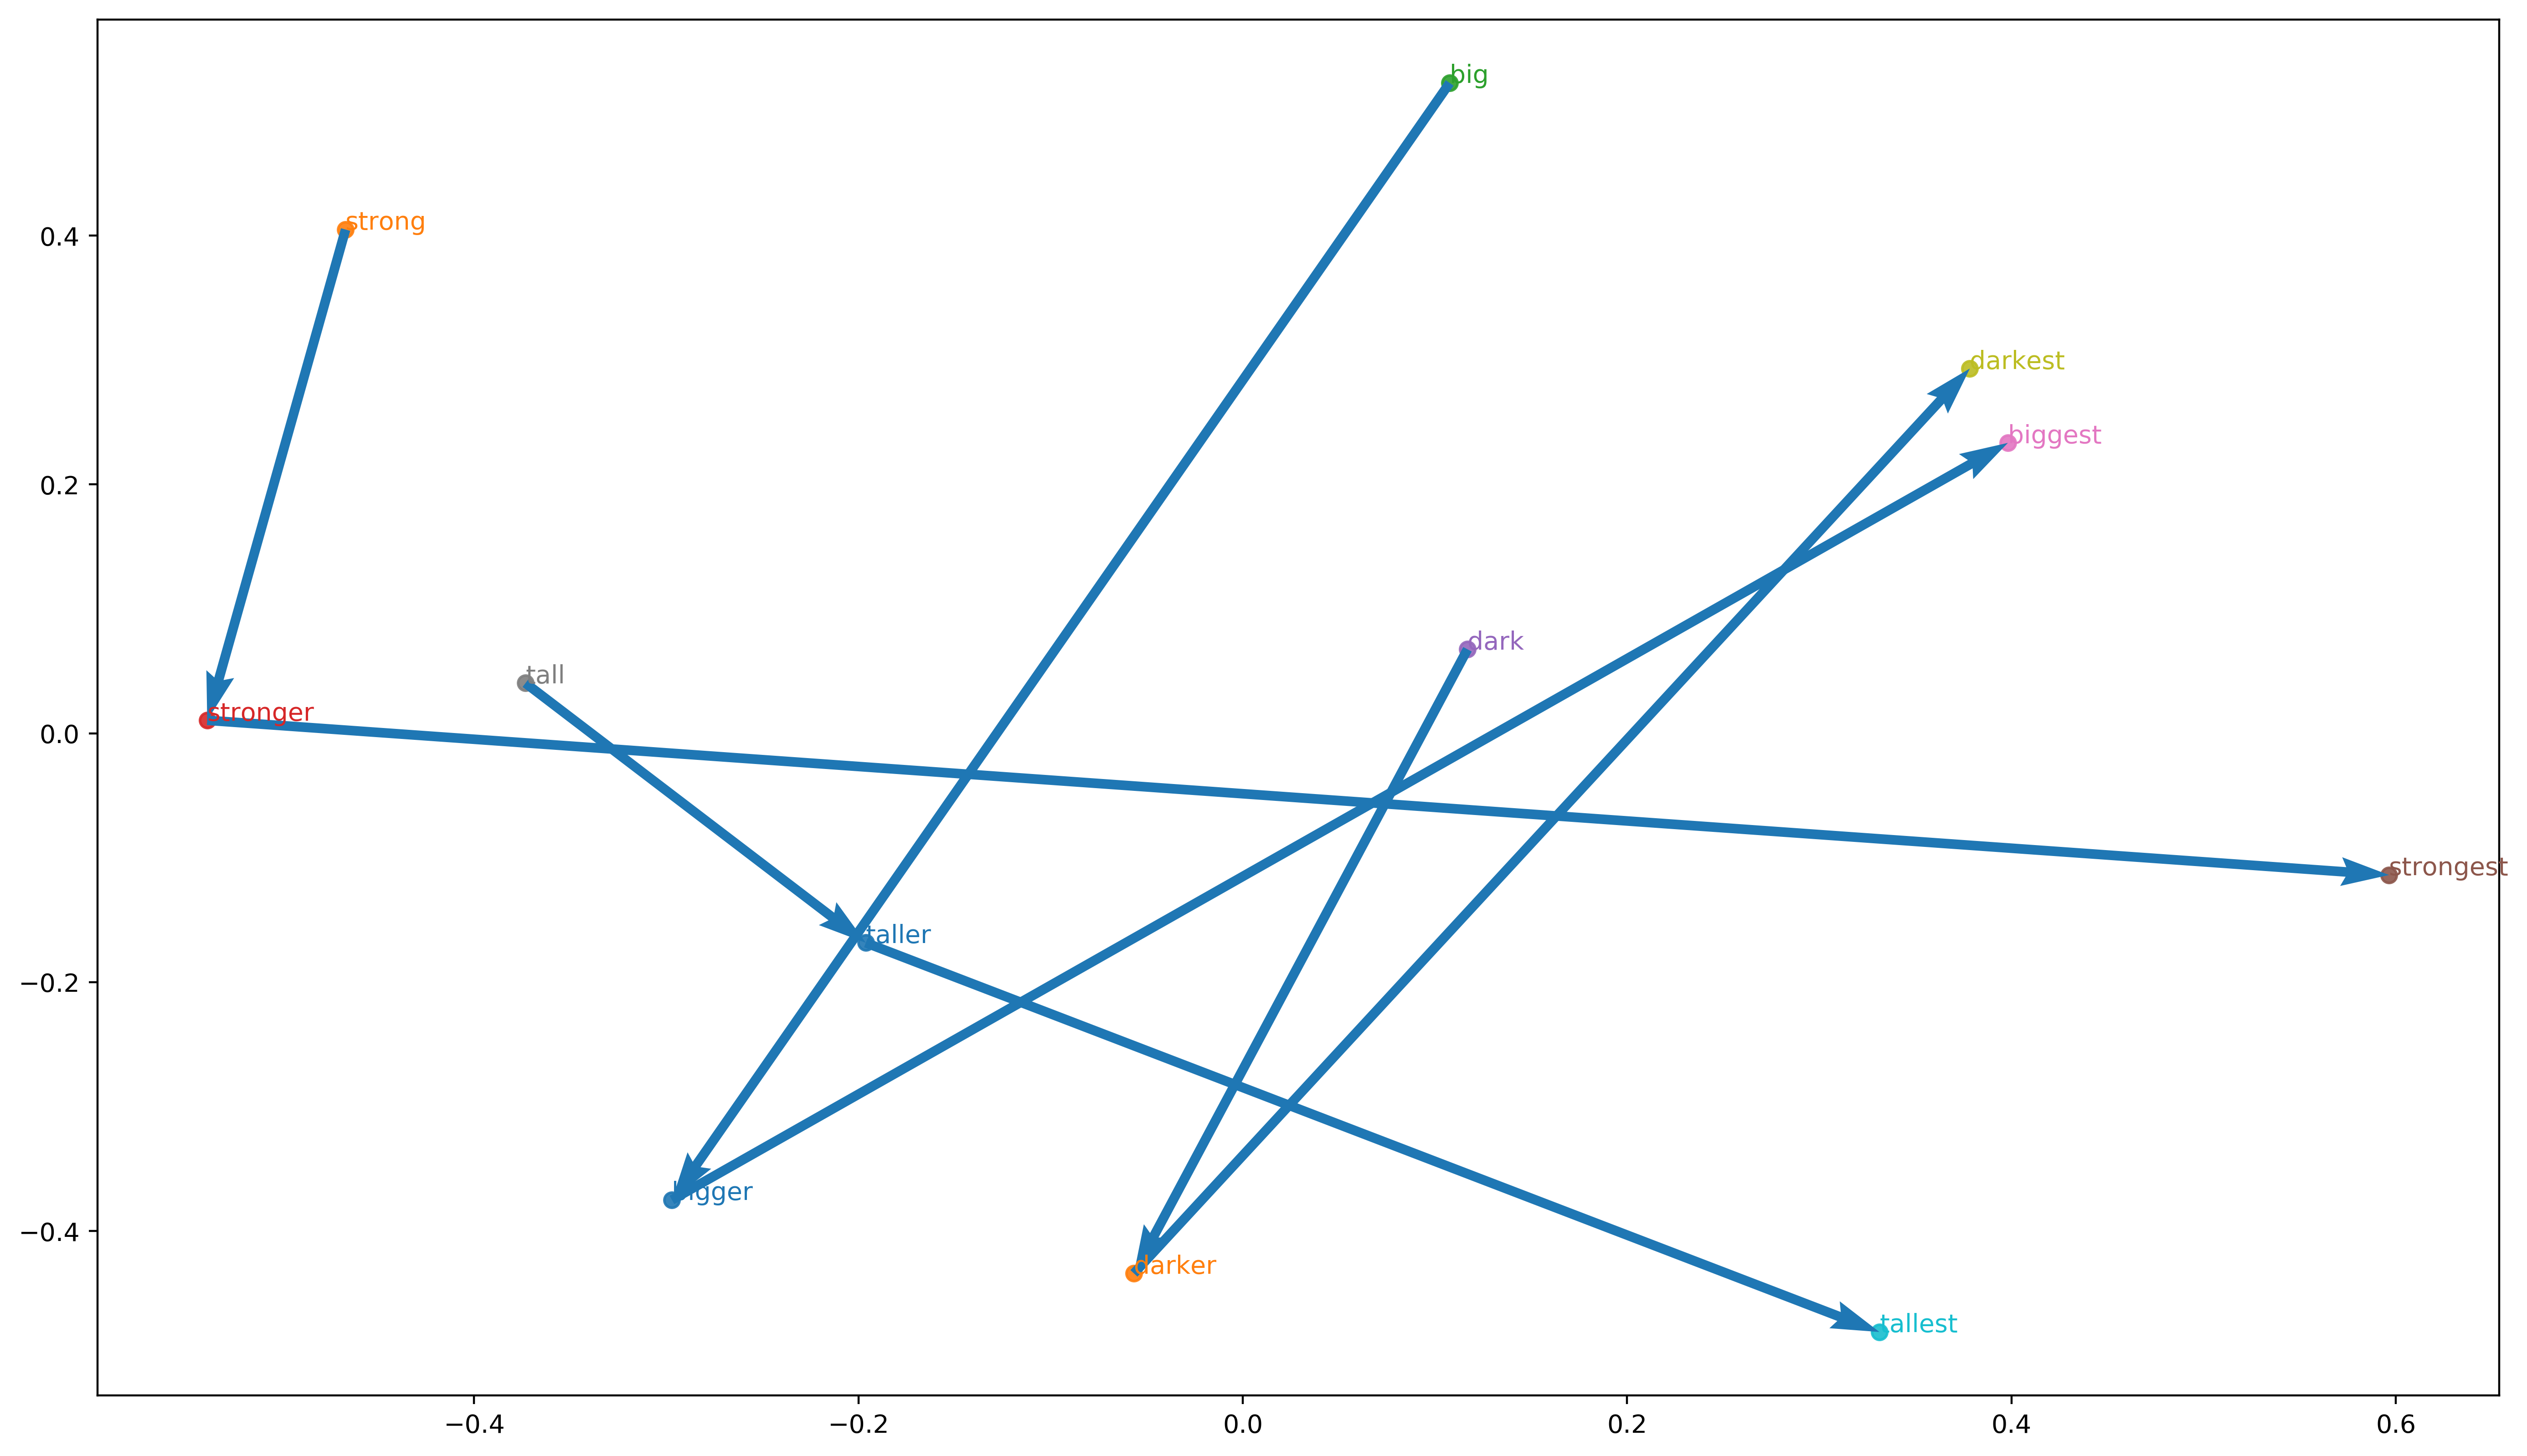

In [164]:
plot_word_pairs ( [("strong", "stronger"),("stronger", "strongest"),("dark", "darker"),("darker", "darkest"),("big", "bigger"),("bigger", "biggest"),("tall", "taller"),("taller", "tallest")])